# Krav til opgaven

- Alle matematiske operationer (kvadratrødder, summering, gennemsnit, osv.) skal laves med NumPy’s funktioner (fx np.sqrt, np.sum, np.mean osv.).
- Programmet må ikke indeholde for- eller while-loops til beregningerne – de skal løses ved hjælp af vektoriserede NumPy-operationer.

# Del 1: Approksimation af $\pi$ med Monte Carlo metoden

## Recap: [Monte Carlo metode](https://en.wikipedia.org/wiki/Monte_Carlo_method)

Vi fortsætter med emnet "approksimation af $\pi$" med Monte Carlo metode fra sidste år. 
Sidste år i vores forløb "simulation og modellering" approksimere vi $\pi$ ved at simulere tilfældige punkter i et kvadrat. Idéen er:
    
- Forestil dig et kvadrat med sidelængde 1, centreret i origo. 
- Tegn en cirkel med radius $\frac{1}{2}$ inde i kvadratet.
- Forholdet mellem cirklens areal og kvadratets areal er:
    
$$ \frac{Areal \; af \; cirkel}{Areal \; af \;kvadrat} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}$$
    
- Hvis man generere mange tilfældige punkter i kvadratet og tæller, hvor mange der falder indenfor cirklen, kan man estimere $\pi$

## Opgaver

- Brug `NumPy` til at generer fx 10.000 tilfældige punkter i kvadratet
- Beregn, hvor mange punkter der ligger indenfor cirklen.
- Udregn et estimat for $\pi$.
- Brug `matplotlib` til at lave et scatter-plot:
      - Punktet **indenfor cirklen** vises med rød farve
      - Punktet **udenfor cirklen** vises med blå farve
- Tegn også cirklen.



## Ekstra udfordring

- Undersøg hvordan estimatet af π forbedres, når du øger antallet af punkter (fx 100, 1.000, 10.000, 100.000).
- Lav et plot af "estimat af $\pi$" som funktion af antallet af punkter.

# Del 2: Radioaktivt henfald

En bestemt radioaktiv isotop har en halveringstid på 5 år. Du skal simulere og visualisere, hvordan mængden af isotopen ændrer sig over tid.

## Model

Mængden af isotopen som funktion af tiden kan beskrives ved formlen:

$$ N(t) = N_0 \cdot e^{-\lambda t} $$

hvor:

- $N_0 =$ startmængden (fx 100g)
- $\lambda = \frac{ln(2)}{T_{1/2}}$ er henfaldskonstanten
- $T_{1/2}$ er halveringstiden

## Opgave

- Brug `NumPy` til at beregne mængden af isotopen for hvert år i de første 50 år.
- Tegn en graf med `Matplotlib`, hvor x-aksen er tiden (år) og y-aksen er mængden tilbage.
- Marker halveringspunkterne (efter 5, 10, 15 år ...) i grafen, så man tydeligt kan se, at mængden halveres.

## Ekstra udfordring 

- Lad programmet beregne, hvornår mængden er under 1g.
- Sammenlign grafen med en simpel "lineær model" og diskuter, hvorfor eksponentiel henfaldsmodel er mere realistisk.

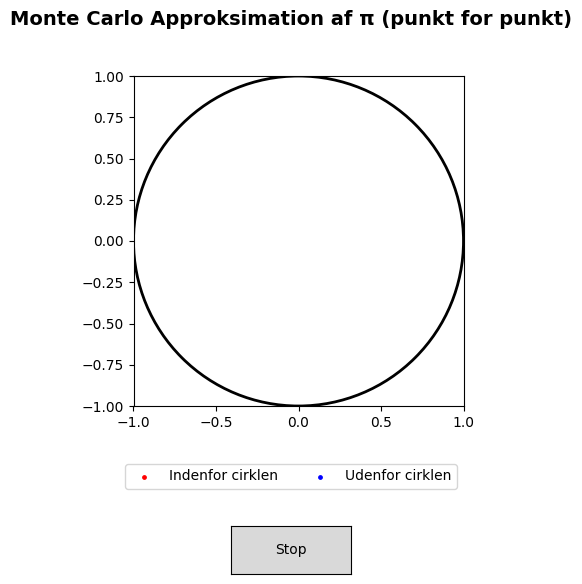

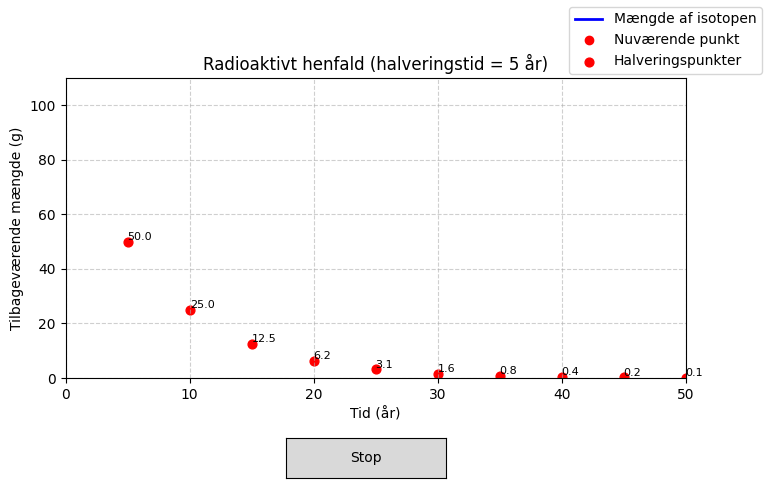

In [1]:
# Del 1: Monte Carlo-approksimation af π

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button

N = 1000000

x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
r = np.sqrt(x**2 + y**2)
inside = r <= 1

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.3, top=0.85)  # plads til titel og tekst
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')

circle = plt.Circle((0,0), 1, color='black', fill=False, linewidth=2)
ax.add_patch(circle)

inside_scatter = ax.scatter([], [], color='red', s=6, label='Indenfor cirklen')
outside_scatter = ax.scatter([], [], color='blue', s=6, label='Udenfor cirklen')

fig.suptitle("Monte Carlo Approksimation af π (punkt for punkt)",
             fontsize=14, weight="bold", y=0.96)

pi_text = fig.text(0.5, 0.91, "", ha="center", va="center", fontsize=12, weight="bold")
count_text = fig.text(0.5, 0.87, "", ha="center", va="center", fontsize=10)

fig.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.15))

def update(frame):
    idx = frame % N  # kør i loop
    current_x = x[:idx+1]
    current_y = y[:idx+1]
    current_inside = inside[:idx+1]

    inside_scatter.set_offsets(np.c_[current_x[current_inside], current_y[current_inside]])
    outside_scatter.set_offsets(np.c_[current_x[~current_inside], current_y[~current_inside]])

    pi_est = 4 * np.mean(current_inside)
    pi_text.set_text(f"Estimat af π: {pi_est:.5f}")
    count_text.set_text(f"Punkter: {idx+1}")

    return inside_scatter, outside_scatter, pi_text, count_text

ani = FuncAnimation(fig, update, frames=np.arange(0, N),
                    interval=0.0001, blit=False, repeat=True)

running = True
def toggle(event):
    global running
    if running:
        ani.event_source.stop()
        running = False
        startstop_button.label.set_text("Start")
    else:
        ani.event_source.start()
        running = True
        startstop_button.label.set_text("Stop")

ax_button = plt.axes([0.4, 0.02, 0.2, 0.08])
startstop_button = Button(ax_button, "Stop")
startstop_button.on_clicked(toggle)

plt.show()

# Del 2: Radioaktivt henfald

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button

N0 = 100  # startmængde (gram)
T_halv = 5  # halveringstid (år)
lambda_ = np.log(2) / T_halv
t = np.linspace(0, 50, 500)  # 0 til 50 år
N = N0 * np.exp(-lambda_ * t)

fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(bottom=0.25, top=0.85)
ax.set_xlim(0, 50)
ax.set_ylim(0, N0 + 10)
ax.set_xlabel("Tid (år)")
ax.set_ylabel("Tilbageværende mængde (g)")
ax.set_title("Radioaktivt henfald (halveringstid = 5 år)")
ax.grid(True, linestyle="--", alpha=0.6)

(line,) = ax.plot([], [], color="blue", lw=2, label="Mængde af isotopen")
(point,) = ax.plot([], [], "ro", label="Nuværende punkt")

halverings_tidspunkter = np.arange(T_halv, 51, T_halv)
N_halv = N0 * np.exp(-lambda_ * halverings_tidspunkter)
ax.scatter(halverings_tidspunkter, N_halv, color="red", s=40, label="Halveringspunkter")
for tx, ny in zip(halverings_tidspunkter, N_halv):
    ax.text(tx, ny, f"{ny:.1f}", ha="left", va="bottom", fontsize=8)

fig.legend(loc="upper right")

info_text = fig.text(0.5, 0.9, "", ha="center", va="center", fontsize=12, weight="bold")

def update_decay(frame):
    xdata = t[:frame]
    ydata = N[:frame]
    line.set_data(xdata, ydata)
    point.set_data([t[frame]], [N[frame]])
    info_text.set_text(f"Tid: {t[frame]:.1f} år — Mængde: {N[frame]:.2f} g")
    return line, point, info_text


ani_decay = FuncAnimation(fig, update_decay, frames=len(t), interval=50, blit=False, repeat=False)

running_decay = True
def toggle_decay(event):
    global running_decay
    if running_decay:
        ani_decay.event_source.stop()
        running_decay = False
        startstop_button_decay.label.set_text("Start")
    else:
        ani_decay.event_source.start()
        running_decay = True
        startstop_button_decay.label.set_text("Stop")

ax_button_decay = plt.axes([0.4, 0.05, 0.2, 0.08])
startstop_button_decay = Button(ax_button_decay, "Stop")
startstop_button_decay.on_clicked(toggle_decay)

plt.show()